In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as scp
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [97]:
from sklearn import datasets
data = datasets.fetch_california_housing()
print(data.DESCR)

# depicting the data
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df = df[:1000]
df.describe()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,3.842993,37.492000,5.226843,1.052389,1219.019000,2.715794,37.73947,-122.15555,2.095186
std,1.811349,13.184604,1.171739,0.107238,996.689703,0.729800,0.09757,0.11630,0.890378
min,0.499900,2.000000,1.714286,0.571429,18.000000,1.437141,37.47000,-122.34000,0.600000
25%,2.562500,28.000000,4.419560,1.000000,661.750000,2.297864,37.68000,-122.25000,1.486500
50%,3.514050,39.000000,5.083685,1.045584,966.500000,2.643192,37.76000,-122.18000,1.953500
75%,4.899225,51.000000,5.957536,1.089518,1447.750000,3.008650,37.81000,-122.08000,2.542000
max,13.499000,52.000000,9.210227,2.700730,12203.000000,12.234043,37.90000,-121.61000,5.000010


## Part 1
Select the most significant factors and build the best model where the target is MedHouseVal.

After that, build a similar model with purified emission data using the Tukey method (according to the selected factors characteristics).

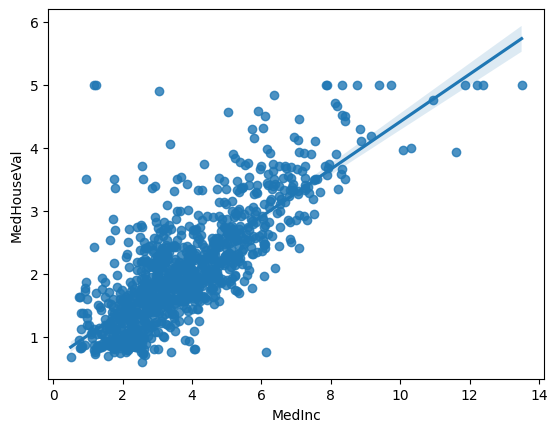

In [98]:
# Creating simple linear regression model, where Median house value is a target, Median income -- explanatory variable
lm = smf.ols("MedHouseVal~MedInc", df).fit()
lm.summary()
# Creation a visual display
sns.regplot(data=df, x="MedInc", y="MedHouseVal", scatter = True)
plt.show()

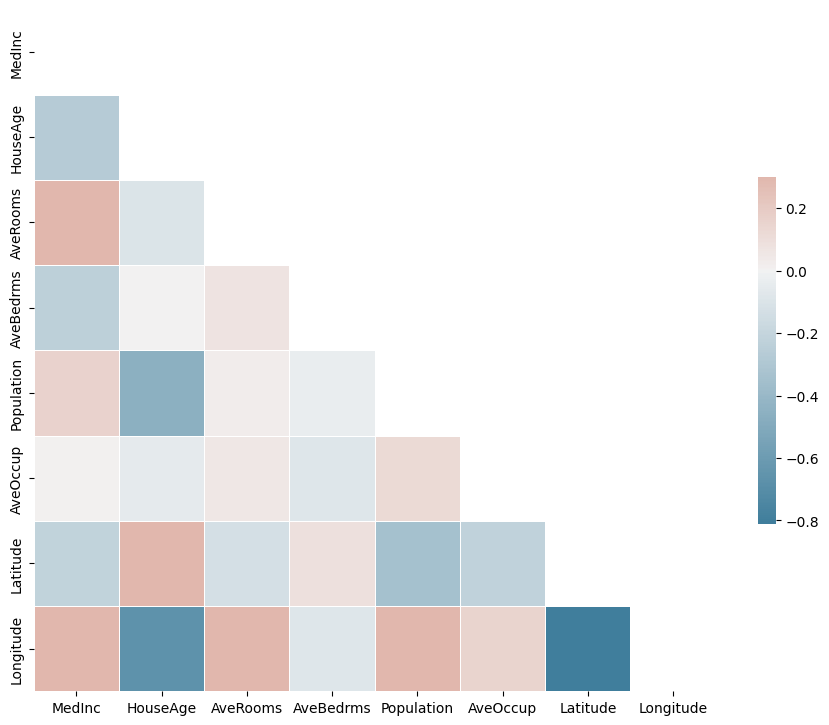

In [99]:
# Creating a correlation matrix to identify possble multicollinearity
corr = df.drop('MedHouseVal', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [100]:
# Longitude parameter is dropped from the assumption of multicollinearity with 2 other parameters
# Creating a multiple linear regression, where Median house value is a target, parameters are remaining explanatory variables
import statsmodels.formula.api as smf
lm = smf.ols("MedHouseVal~MedInc+HouseAge+AveRooms+AveBedrms+Population+AveOccup+Latitude", df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     250.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          3.59e-214
Time:                        22:51:26   Log-Likelihood:                -793.58
No. Observations:                1000   AIC:                             1603.
Df Residuals:                     992   BIC:                             1642.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.1704      9.086     -7.063      0.000     -82.000     -46.340
MedInc         0.3872      0.018     21.564      0.000       0.352       0.422
HouseAge      -0.0008      0.002     -0.431      0.667      -0.005       0.003
AveRooms       0.0003      0.026      0.012      0.990      -0.051       0.052
AveBedrms     -0.0462      0.185     -0.250      0.803      -0.408       0.316
Population  9.027e-05   1.95e-05      4.636      0.000    5.21e-05       0.000
AveOccup      -0.1426      0.024     -5.837      0.000      -0.191      -0.095
Latitude       1.7258      0.242      7.138      0.000       1.251       2.200
==============================================================================
Omnibus:                      433.216   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3884.490
Skew:                           1.750   Prob(JB):                         0.00
Kurtosis:                      11.999   Cond. No.                     8.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
# AveRooms p-value = 0.99, reacreating the model without this parameter
lm = smf.ols("MedHouseVal~MedInc+HouseAge+AveBedrms+Population+AveOccup+Latitude", df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     292.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          2.01e-215
Time:                        22:51:31   Log-Likelihood:                -793.58
No. Observations:                1000   AIC:                             1601.
Df Residuals:                     993   BIC:                             1636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.1603      9.043     -7.095      0.000     -81.905     -46.415
MedInc         0.3874      0.010     38.520      0.000       0.368       0.407
HouseAge      -0.0008      0.002     -0.437      0.662      -0.004       0.003
AveBedrms     -0.0452      0.165     -0.274      0.784      -0.368       0.278
Population  9.025e-05   1.94e-05      4.662      0.000    5.23e-05       0.000
AveOccup      -0.1426      0.024     -5.882      0.000      -0.190      -0.095
Latitude       1.7256      0.241      7.173      0.000       1.254       2.198
==============================================================================
Omnibus:                      433.094   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3882.339
Skew:                           1.750   Prob(JB):                         0.00
Kurtosis:                      11.996   Cond. No.                     8.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# AveBedrms p-value = 0.784, reacreating the model without this parameter
lm = smf.ols("MedHouseVal~MedInc++HouseAge+Population+AveOccup+Latitude", df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     351.1
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          1.06e-216
Time:                        22:51:34   Log-Likelihood:                -793.62
No. Observations:                1000   AIC:                             1599.
Df Residuals:                     994   BIC:                             1629.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.0062      9.021     -7.095      0.000     -81.709     -46.304
MedInc         0.3881      0.010     39.780      0.000       0.369       0.407
HouseAge      -0.0008      0.002     -0.411      0.681      -0.004       0.003
Population  9.033e-05   1.93e-05      4.669      0.000    5.24e-05       0.000
AveOccup      -0.1421      0.024     -5.879      0.000      -0.190      -0.095
Latitude       1.7201      0.240      7.179      0.000       1.250       2.190
==============================================================================
Omnibus:                      433.314   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3909.704
Skew:                           1.748   Prob(JB):                         0.00
Kurtosis:                      12.034   Cond. No.                     8.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
# HouseAge p-value = 0.681, reacreating the model without this parameter
lm = smf.ols("MedHouseVal~MedInc+Population+AveOccup+Latitude", df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     439.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          5.17e-218
Time:                        22:51:39   Log-Likelihood:                -793.70
No. Observations:                1000   AIC:                             1597.
Df Residuals:                     995   BIC:                             1622.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.8205      7.280     -8.492      0.000     -76.107     -47.534
MedInc         0.3886      0.010     40.264      0.000       0.370       0.408
Population  9.296e-05   1.82e-05      5.095      0.000    5.72e-05       0.000
AveOccup      -0.1436      0.024     -6.004      0.000      -0.190      -0.097
Latitude       1.6614      0.192      8.644      0.000       1.284       2.039
==============================================================================
Omnibus:                      433.912   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3913.163
Skew:                           1.752   Prob(JB):                         0.00
Kurtosis:                      12.036   Cond. No.                     6.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# AIC & BIC characteristics have lowered, the remaining parameters are informative
# Dropping the insignificant parameters' columns from the dataframe
df = df.drop(['HouseAge','AveRooms','AveBedrms','Longitude'], axis='columns')
df.head()

,MedInc,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,322.0,2.555556,37.88,4.526
1,8.3014,2401.0,2.109842,37.86,3.585
2,7.2574,496.0,2.802260,37.85,3.521
3,5.6431,558.0,2.547945,37.85,3.413
4,3.8462,565.0,2.181467,37.85,3.422


In [105]:
# Linear regression is nonrobust, cons. dealing with outliers is needed (IQR method)
#MedInc
a_medinc = np.percentile(df['MedInc'], 25)
b_medinc = np.percentile(df['MedInc'], 75)
IQR_medinc = b_medinc - a_medinc
low_medinc = a_medinc - 1.5 * IQR_medinc
high_medinc = b_medinc + 1.5 * IQR_medinc
#Population
a_pop = np.percentile(df['Population'], 25)
b_pop = np.percentile(df['Population'], 75)
IQR_pop = b_pop - a_pop
low_pop = a_pop - 1.5 * IQR_pop
high_pop = b_pop + 1.5 * IQR_pop
#AveOccup
a_aveoccup = np.percentile(df['AveOccup'], 25)
b_aveoccup = np.percentile(df['AveOccup'], 75)
IQR_aveoccup = b_aveoccup - a_aveoccup
low_aveoccup = a_aveoccup - 1.5 * IQR_aveoccup
high_aveoccup = b_aveoccup + 1.5 * IQR_aveoccup
#Latitude
a_latitude = np.percentile(df['Latitude'], 25)
b_latitude = np.percentile(df['Latitude'], 75)
IQR_latitude = b_latitude - a_latitude
low_latitude = a_latitude - 1.5 * IQR_latitude
high_latitude = b_latitude + 1.5 * IQR_latitude
# New dataframe with filtrated data using Tukey IQR method
df_clear = df[(df['MedInc'] > a_medinc - 1.5 * IQR_medinc) &
              (df['MedInc'] < b_medinc + 1.5 * IQR_medinc) &
              (df['Population'] > a_pop - 1.5 * IQR_pop) &
              (df['Population'] < b_pop + 1.5 * IQR_pop) &
              (df['AveOccup'] > a_aveoccup - 1.5 * IQR_aveoccup) &
              (df['AveOccup'] < b_aveoccup + 1.5 * IQR_aveoccup) &
              (df['Latitude'] > a_latitude - 1.5 * IQR_latitude) &
              (df['Latitude'] < b_latitude + 1.5 * IQR_latitude)]

In [106]:
# Creating a Final model (№1) with filtrated data
lm = smf.ols("MedHouseVal~MedInc+Population+AveOccup+Latitude", df_clear).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     529.6
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          1.72e-233
Time:                        22:52:00   Log-Likelihood:                -560.65
No. Observations:                 894   AIC:                             1131.
Df Residuals:                     889   BIC:                             1155.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.6769      7.090     -5.032      0.000     -49.591     -21.762
MedInc         0.4164      0.010     42.804      0.000       0.397       0.436
Population     0.0001   3.04e-05      4.464      0.000     7.6e-05       0.000
AveOccup      -0.4849      0.032    -15.228      0.000      -0.547      -0.422
Latitude       0.9883      0.187      5.294      0.000       0.622       1.355
==============================================================================
Omnibus:                      256.363   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1434.630
Skew:                           1.188   Prob(JB):                         0.00
Kurtosis:                       8.733   Cond. No.                     5.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Part 2
Build 4 models based on the training sample:

* The best (previously built), without the Population attribute;
* The best (previously built), with the logarithmized attribute Population;
* The  model with pre-cleaned outliers without Population attribute;
* The  model with pre-cleaned outliers with logarithmized Population attribute

Evaluate the results obtained from the test sample. Visualize the results.


### Model 1 (with outliers, without Population)

In [110]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
print(df_train.shape, df_test.shape, '\n')

df_train1 = df_train
df_test1 = df_test

(700, 5) (300, 5) 



In [111]:
# Creating a model (№2) without Population
lm1 = smf.ols("MedHouseVal~MedInc+AveOccup+Latitude", df_train1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     395.9
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          5.66e-150
Time:                        22:56:23   Log-Likelihood:                -539.09
No. Observations:                 700   AIC:                             1086.
Df Residuals:                     696   BIC:                             1104.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.2537      8.117     -4.589      0.000     -53.191     -21.317
MedInc         0.3777      0.011     33.662      0.000       0.356       0.400
AveOccup      -0.1650      0.029     -5.643      0.000      -0.222      -0.108
Latitude       1.0155      0.214      4.738      0.000       0.595       1.436
==============================================================================
Omnibus:                      348.963   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4717.080
Skew:                           1.889   Prob(JB):                         0.00
Kurtosis:                      15.143   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
from sklearn.metrics import r2_score, mean_squared_error
pr_data1 = lm1.get_prediction(df_test1)
r2_score(pr_data1.predicted, df_test1.MedHouseVal), mean_squared_error(pr_data1.predicted, df_test1.MedHouseVal)

(0.2512628097896624, 0.34895628984816524)

### Model 2 (with log(Population), with outliers)

In [113]:
# Creation model (№3) with a logariphmized Population parameter values
df_train2 = df_train1
df_train2['Population'] = np.log10(df_train2['Population'])

df_test2 = df_test1
df_test2['Population'] = np.log10(df_test2['Population'])

In [114]:
lm2 = smf.ols("MedHouseVal~MedInc+Population+AveOccup+Latitude", df_train2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     308.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          2.21e-152
Time:                        22:56:43   Log-Likelihood:                -530.39
No. Observations:                 700   AIC:                             1071.
Df Residuals:                     695   BIC:                             1094.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.8889      8.416     -5.690      0.000     -64.413     -31.364
MedInc         0.3744      0.011     33.683      0.000       0.353       0.396
Population     0.2996      0.072      4.181      0.000       0.159       0.440
AveOccup      -0.1712      0.029     -5.916      0.000      -0.228      -0.114
Latitude       1.2744      0.221      5.774      0.000       0.841       1.708
==============================================================================
Omnibus:                      375.585   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5325.418
Skew:                           2.070   Prob(JB):                         0.00
Kurtosis:                      15.863   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
pr_data2 = lm2.get_prediction(df_test2)
r2_score(pr_data2.predicted, df_test2.MedHouseVal), mean_squared_error(pr_data2.predicted, df_test2.MedHouseVal)

(0.262756671880952, 0.3430765267616299)

### Model 3 (without Population, without outliers)

In [116]:
df_clear_train, df_clear_test = train_test_split(df_clear, test_size=0.3, random_state=0)
df_clear_train['Population'] = np.log10(df_clear_train['Population'])
df_clear_test['Population'] = np.log10(df_clear_test['Population'])

In [118]:
lm3 = smf.ols("MedHouseVal~MedInc+AveOccup+Latitude", df_clear_train).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     479.6
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          3.36e-161
Time:                        22:57:43   Log-Likelihood:                -396.31
No. Observations:                 625   AIC:                             800.6
Df Residuals:                     621   BIC:                             818.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.1484      8.365     -3.724      0.000     -47.575     -14.722
MedInc         0.4138      0.012     35.231      0.000       0.391       0.437
AveOccup      -0.4641      0.037    -12.406      0.000      -0.538      -0.391
Latitude       0.8710      0.220      3.952      0.000       0.438       1.304
==============================================================================
Omnibus:                      192.770   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1471.656
Skew:                           1.152   Prob(JB):                         0.00
Kurtosis:                      10.156   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
pr_data3 = lm3.get_prediction(df_test1)
r2_score(pr_data3.predicted, df_test1.MedHouseVal), mean_squared_error(pr_data3.predicted, df_test1.MedHouseVal)

(0.37606798353090887, 0.4243744716408289)

### Model 4 (with log(Population), without outliers)

In [120]:
lm4 = smf.ols("MedHouseVal~MedInc+Population+AveOccup+Latitude", df_clear_train).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     374.2
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          1.08e-163
Time:                        22:58:08   Log-Likelihood:                -387.32
No. Observations:                 625   AIC:                             784.6
Df Residuals:                     620   BIC:                             806.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -37.7922      8.398     -4.500      0.000     -54.285     -21.299
MedInc         0.4125      0.012     35.591      0.000       0.390       0.435
Population     0.3043      0.072      4.254      0.000       0.164       0.445
AveOccup      -0.4734      0.037    -12.806      0.000      -0.546      -0.401
Latitude       1.0240      0.220      4.647      0.000       0.591       1.457
==============================================================================
Omnibus:                      211.087   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.435
Skew:                           1.329   Prob(JB):                    5.94e-309
Kurtosis:                       9.888   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
pr_data4 = lm4.get_prediction(df_test2)
r2_score(pr_data4.predicted, df_test2.MedHouseVal), mean_squared_error(pr_data4.predicted, df_test2.MedHouseVal)

(0.390782574498851, 0.4179003358279217)

## Results

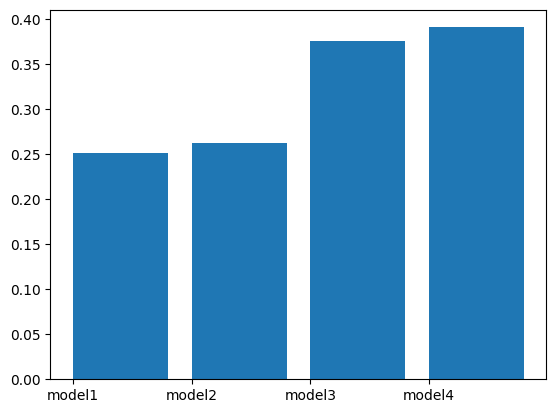

In [134]:
# barchart for r2 scores
index = np.arange(4)
values1 = [r2_score(pr_data1.predicted, df_test1.MedHouseVal),
           r2_score(pr_data2.predicted, df_test2.MedHouseVal),
           r2_score(pr_data3.predicted, df_test1.MedHouseVal),
           r2_score(pr_data4.predicted, df_test2.MedHouseVal)]
plt.bar(index, values1)
plt.xticks(index-0.4,['model1','model2','model3','model4'])
plt.show()

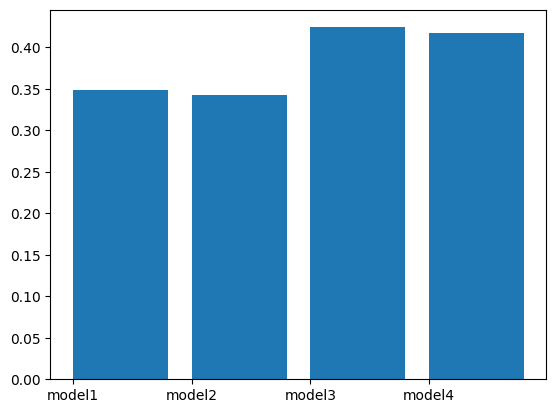

In [133]:
# barchart for MSE
index = np.arange(4)
values2 = [mean_squared_error(pr_data1.predicted, df_test1.MedHouseVal),
           mean_squared_error(pr_data2.predicted, df_test2.MedHouseVal),
           mean_squared_error(pr_data3.predicted, df_test1.MedHouseVal),
           mean_squared_error(pr_data4.predicted, df_test2.MedHouseVal)]
plt.bar(index, values2)
plt.xticks(index-0.4,['model1','model2','model3','model4'])
plt.show()

According to the results of laboratory work No. 4, 4 models were obtained:
1. Model with outliers and without Population factor,
2. A model with outliers and with the inclusion of a logarithmized Population factor,
3. A model purified from outliers by the D. Tukey method, and without the Population factor,
4. A model purified from outliers by the D. Tukey method, and with the inclusion of a logarithmized Population factor.

All models were built based on training samples, and their characteristics were evaluated using raw test samples.

According to the R2 indicator, model No. 4 is the best. Almost the same result is observed in model No. 3. Therefore, according to the r^2 parameter, the best models are those cleared of emissions by the D. Tukey method.

According to the mean squared error indicator, the best models are models No. 1 and No. 2, they produce fewer gross errors. However, their r^2 is relatively low, so in the end we prefer model No. 4, since its mean squared error is less than the similar indicator of model No. 3.

In this case, other characteristics of the models should be considered to determine the best model. So, according to the indicators of the adjusted coefficient of determination, AIC, BIC, Log-Likelihood, model No. 4 is the best. This does not contradict the conclusion made above in terms of r^2 and mean squared error, so we choose it (an outlier-free model with a logarithmized Population parameter).